# Laporan Praktikum Sistem Kendali Cerdas
# Abdul Mujiburrohman Luthfi (19507334027)

## Membership Function Input & Output

In [44]:
%matplotlib inline

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Berikut pemanggilan Library dan inisialisasi nya yang akan kita gunakan untuk proyek ini : <br>
   - Library <b>NumPy</b> di inisialisasi dengan <b>np</b> <br>
   - Library <b>Skfuzzy</b> di inisialisasi dengan <b>fuzz</b> <br>
   - Mengambil package <b>Control</b> dari skfuzzy yang di inisialisasi dengan <b>ctrl.</b> <br>

Kita bisa menggunakan semua library dan package yang sudah kkita import dengan cara memanggil inisialisasinya 

Antecedent: dirt


F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


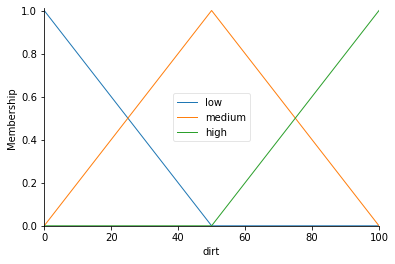

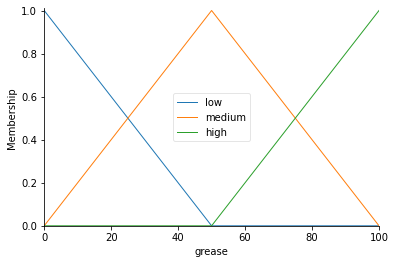

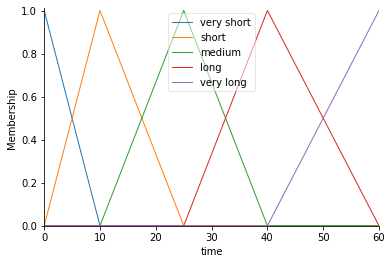

In [11]:
# Membership Function Input & Output

dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'dirt')
grease = ctrl.Antecedent(np.arange(0, 101, 1), 'grease')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

print(dirt)

dirt['low']    = fuzz.trimf(dirt.universe, [0,0,50])
dirt['medium'] = fuzz.trimf(dirt.universe, [0,50,100])
dirt['high']   = fuzz.trimf(dirt.universe, [50,100,100])

grease['low']    = fuzz.trimf(grease.universe, [0,0,50])
grease['medium'] = fuzz.trimf(grease.universe, [0,50,100])
grease['high']   = fuzz.trimf(grease.universe, [50,100,100])

time ['very short'] = fuzz.trimf(time.universe, [0,0,10])
time ['short']      = fuzz.trimf(time.universe, [0,10,25])
time ['medium']     = fuzz.trimf(time.universe, [10,25,40])
time ['long']       = fuzz.trimf(time.universe, [25,40,60])
time ['very long']  = fuzz.trimf(time.universe, [40,60,60])

dirt.view()
grease.view()
time.view()

Pada kali ini kita akan mencoba membedah kode yang sudah diberikan oleh pak dosen. <br>
Terlihat diatas sudah ada kode <b>"Membership Function Input & output"</b> yang diberikan sebagai contoh acuan untuk tugas modifikasi yang akan kita lakukan. Berikut arti/ maksud dari syntax beserta parameternya yang ada di bawah ini :

   - Antecedent (input) = untuk memnyimpan variabel dan keanggotaan. Parameternya yaitu kisaran nilai fuzzy dan variabel tersebut [<i>np.arange(0, 101, 1), 'dirt'</i>]
   - trimf = Generator fungsi keanggotaan segitiga. Parameternya yaitu x dan abc [<i>trimf(x, abc)</i>], dimana x adalah variabel diawal, dan abc adalah Angka pengontrol untuk membnetuk vektor 3 elemen segitiga
   - view = digunakan untuk menampilkan grafik dari kode yang sudah kita buat

Sudah disebutkan bahwasanya fungsi Antacedent digunakan untuk menyimpan variabel, lalu kita akan mengupas nilai fuzzy yang akan digunakan untuk acuan variabelnya. Berikut penjelasnaya : <br>
1) Nilai Dirt : <br>
  - Dirt akan dikatakan <b>LOW</b> jika nilainya < 50, <br>
  - Dirt akan dikatakan <b>MEDIUM</b> jika nilainya 0-100 [ <i>top = 50</i> ], <br>
  - Dirt akan dikatakan <b>HIGH</b> jika nilainya 50-100 <br>
    
2) Nilai Grease : <br>
  - Grease akan dikatakan <b>LOW</b> jika nilainya < 50, <br>
  - Grease akan dikatakan <b>MEDIUM</b> jika nilainya 0-100 [ <i>top = 50</i> ],  <br>
  - Grease akan dikatakan <b>HIGH</b> jika nilainya 50-100 <br>
3) Nilai Time : <br>
  - Time akan dikatakan <b>VERY SHORT</b> jika nilainya < 10, <br>
  - Time akan dikatakan <b>SHORT</b> jika nilainya 0-25 [ <i>top = 10 </i> ] <br>
  - Time akan dikatakan <b>MEDIUM</b> jika nilainya 10-40 [ <i>top = 25 </i> ] <br>
  - Time akan dikatakan <b>LONG</b> jika nilainya 25-60 [ <i>top = 40 </i> ] <br>
  - Time akan dikatakan <b>VERY LONG</b> jika nilainya 40-60 <br>

## Rule Base

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

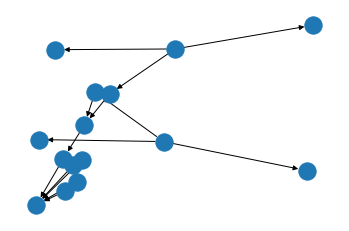

In [12]:
# Rule base

rule1 = ctrl.Rule(dirt['low']    & grease['low'],    time['very short'])
rule2 = ctrl.Rule(dirt['low']    & grease['medium'], time['medium'])
rule3 = ctrl.Rule(dirt['low']    & grease['high'],   time['long'])
rule4 = ctrl.Rule(dirt['medium'] & grease['low'],    time['short'])
rule5 = ctrl.Rule(dirt['medium'] & grease['medium'], time['medium'])
rule6 = ctrl.Rule(dirt['medium'] & grease['high'],   time['long'])
rule7 = ctrl.Rule(dirt['high']   & grease['low'],    time['medium'])
rule8 = ctrl.Rule(dirt['high']   & grease['medium'], time['long'])
rule9 = ctrl.Rule(dirt['high']   & grease['high'],   time['very long'])

rule1.view()
#rule2.view()
#rule3.view()
#rule4.view()
#rule5.view()
#rule6.view()
#rule7.view()
#rule8.view()

Sebelumnya kita akan mengupas maksud beserta parameter dari class/ fungsi [ <i>Rule</i> ] yang ada diprogram diatas. Berikut penjelasanya : <br>

[ <b>control.Rule<i>(antecedent=None, consequent=None, label=None)</i></b> ] <br>

Parameter : <br>
1) Antecedent = Berupa variabel input & bisa digabungkan dengan operator AND/OR/NOT, penerapan pada kasus diatas [ <i>dirt['low']    & grease['medium']</i> ] <br>
2) Konsekuensi = berupa variabel output dan bisa digabungkan juga dengan operator AND/OR/NOT, penerapan pada kasus diatas [ <i>time['very short']</i> ] <br>
3) Label (sString, Optional) = digunakan untuk merujuk arti dari Rule ini

Rule Base ini akan banyak menggunakan kalimat IF dan THEN, tetapi karena kita menggunakan skfuzzy hal ini akan dipermudah dengan adanya function yang sudah dimiliki oleh skfuzzy. Jadi nanti kita hanya perlu memanggil function nya saja. Rule Base ini juga biasanya dibuat oleh penciptanya, karena fungsi apapun yang ada dalam program itu sudah diatur berdasarkan keinginan si penciptnya, hal ini tentu sangat pribadi dan setiap alat/produk pasti akan berbeda Rule Base nya. Biasanya, untuk memudahkan pemetaan Rule Base-nya dibuat semacam tabel dimana x dan y nya adalah 2 input yang berrbeda. Lalu kita bisa mendevinisikan hasil x dan y nya dengan nilai fuzzy yang kita buat sendiri. Pada contoh ini ada 9 Rule Base yang sudah dibuatkan, kita akan mengupas aturanya. Berikut keteranganya : <br>

1) Aturan1 = Jika kotoran di baju Rendah DAN minyaknya Rendah, maka waktu pencucianya Sangat pendek 
2) Aturan2 = Jika kotoran di baju Rendah DAN minyaknya Sedang, maka waktu pencucianya Sedang
3) Aturan3 = Jika kotoran di baju Rendah DAN minyaknya Tinggi, maka waktu pencucianya Lama
4) Aturan4 = Jika kotoran di baju Sedang DAN minyaknya Rendah, maka waktu pencucianya Pendek
5) Aturan5 = Jika kotoran di baju Sedang DAN minyaknya Sedang, maka waktu pencucianya Sedang
6) Aturan6 = Jika kotoran di baju Sedang DAN minyaknya Tinggi, maka waktu pencucianya Lama
7) Aturan8 = Jika kotoran di baju Tinggi DAN minyaknya Rendah, maka waktu pencucianya Sedang
8) Aturan8 = Jika kotoran di baju Tinggi DAN minyaknya Sedang, maka waktu pencucianya Lama
9) Aturan9 = Jika kotoran di baju Tinggi DAN minyaknya Tinggi, maka waktu pencucianya Sangat Lama <br>

Setelah semua aturan/ Rule Base sudah di definisikan, dalam jupyter ini kita bisa menggunakan fungsi view [ <i>rule1.view()</i> ] untuk menampilkan Figure dari Rule Base yang sudah kita buat tadi. Varibel untuk menampilkan figure nya tentu disesuaikan dengan Rule Base mana yang ingin kita tampilkan. Pada contoh diatas, sudah ditampilkan figure dari [ <i>rule1</i> ]

## Calculation

33.60841423948222


F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


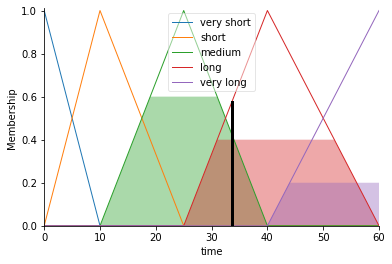

In [8]:
# Output calculation

time_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
wash_time = ctrl.ControlSystemSimulation(time_control)

wash_time.input['dirt'] = 60 # 0 - 100
wash_time.input['grease'] = 70 # 0 - 100
wash_time.compute() # 0 - 60

print(wash_time.output['time'])
time.view(sim=wash_time)

Untuk menghitung output nya kita sudah disediakan sebuah function dari Fuzzy logic, yaitu fungsi controlSytem dengan parameternya adalah dari Rule Base tadi yang sudah kita desfinisikan. Jadi kita tidak perlu menggunkan metode Deffuzification unbtuk menghitung outputnya. Berikut keteranganya :

[ <i>skfuzzy.control.ControlSystem(rules=None)</i> ] <br>
Parameter = Rule --> Rule ini dari semua Rule Base yanh tadi sudah kita definisikan, jika lebih dari satu dan itu string kita bisa menggunakan brackets/ kurung besar untuk mendefinisikanya.

Setelah kita menyebutkan parameternya, lalu kita bisa meletakan outputnya di variabel baru lagi. Tentunya dengan menyebutkn juga variabel input yang sudah kita buat. Outputnya disimpan di variabel [ <i>wash_time</i> ]. Pada contoh kali ini dikarenakan inputnya berbeda-beda, maka kita perlu mendefinisikan nilianya di akhir kalimat. Seperti pada contoh diatas, nilai daripada [ <i>dirt</i> ] adalah 60, dan nilai [ <i>Grease</i> ] nya adalah 70. Jika sudah di sebutkan nilai variabelnya barulah kita bisa mencetak hasil output daripada program yang sudah kita buat. Untuk menampilkan outputnya cukup mudah, kita hanya perlu menggunakan fungsi print dengan parameter variabel tempat kita mengyimpan nilainya lalu ditambahkan ofungsi output dibelakangnya.

# Tugas: create another Fuzzy Logic Controller [ <i>Machine Blender</i> ]

Pada contoh kasus kali ini saya akanmembuat Fuzzy Logic Controller untuk Mesin Blender. Nilai yang akan saya hitung adalah Banyaknya bahan yang diblender, Waktu yang dibutuhkan untuk menghaluskan, Hasil dari sesuatu yang di blender tersebut. Untuk lebih jelas dan detailnya bisa simak penjelasan berikut.

In [13]:
%matplotlib inline

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Seperti sebelumnya, kita membuat program, kita akan mengimport library dan menginisialisasinya terlebih dahulu. Sebenranya jika kita membuat projek masih dalam satu page, kita tidak perlu menulislkan import kembali. Tapi karena disini saya asumsikan membuat projeknya di halaman yang berbeda dengan halamn materi, jadi saya definisikan ulang. Jika anda tidak menginginkanya, itu tidak masalah.

Antecedent: many


F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


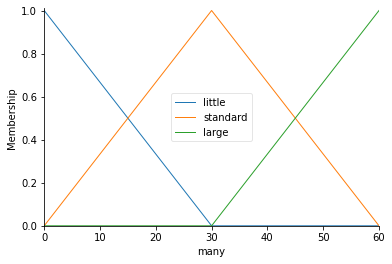

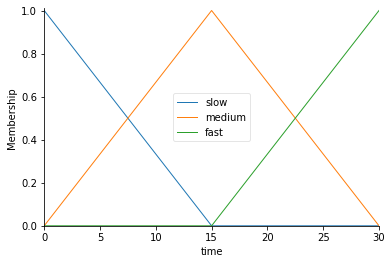

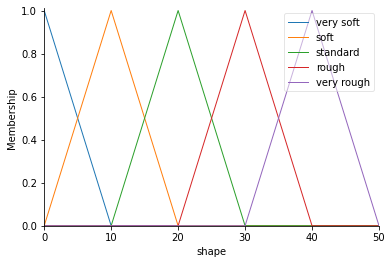

In [24]:
# Membership Function Input & Output

many = ctrl.Antecedent(np.arange(0, 61, 1), 'many')
time = ctrl.Antecedent(np.arange(0, 31, 1), 'time')
shape = ctrl.Consequent(np.arange(0, 51, 1), 'shape')

print(many)

many['little']        = fuzz.trimf(many.universe, [0,0,30])
many['standard']      = fuzz.trimf(many.universe, [0,30,60])
many['large']         = fuzz.trimf(many.universe, [30,60,60])

time['slow']         = fuzz.trimf(time.universe, [0,0,15])
time['medium']       = fuzz.trimf(time.universe, [0,15,30])
time['fast']         = fuzz.trimf(time.universe, [15,30,30])

shape['very soft']   = fuzz.trimf(shape.universe, [0,0,10])
shape['soft']        = fuzz.trimf(shape.universe, [0,10,20])
shape['standard']    = fuzz.trimf(shape.universe, [10,20,30])
shape['rough']       = fuzz.trimf(shape.universe, [20,30,40])
shape['very rough']  = fuzz.trimf(shape.universe, [30,40,50])

many.view()
time.view()
shape.view()

Pada contoh kasus kali ini, saya memberikan 3 nilai yang berbeda. Yaitu [ <b>Many, Speed, Shape</b> ] dan tentunya dengan batasan maksimum yang berbeda. Untuk "Many" sendiri saya memberikan batas maksimal nilanya adalah 60, "Speed" nya 30, dan "Shape" nya adalah 50. Saya juga membuat parameter dari variabel tersebut berbeda-beda.

# Perhitungan Input 'Many' secara manual

Berikut penjelasanya :
- little(x) = 30-x/30, 0 <= x <= 30
- standard(x) = x/30, 0 <= x <= 30 dan standard(x) = 60-x/30, 30 <= x <= 60
- large(x) = x-30/30, 30 <= x <= 60

# Perhitungan Input 'time' secara manual
Berikut penjelasanya :
- slow(x) = 15-x/15, 0 <= x <= 15
- medium(x) = x/15, 0 <= x <= 15 dan standard(x) = 30-x/15, 15 <= x <= 30
- fast(x) = x-15/15, 15 <= x <= 30

# Perhitungan output 'Shape' secara manual
Berikut penjelasanya :

- very soft(x)   = 10-x/10, 0 <= x <= 10
- soft(x)        = x/10, 0 <= x <= 10 dan 20-x/15, 10 <= x <= 20
- standard(x)    = x-10, 10 <= x <= 20 dan 30-x/15, 20 <= x <= 30  
- rough(x)       = x-20, 20 <= x <= 30 dan 40-x/25, 30 <= x <= 40
- very rough(x)  = x-30, 30 <= x <= 40 dan 50-x/35, 40 <= x <= 50

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

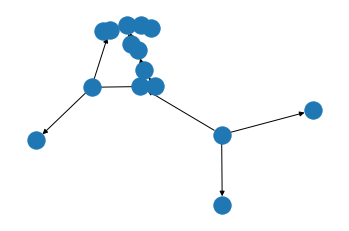

In [32]:
# Rule base

rule1 = ctrl.Rule(many['little']    & time['slow'],    shape['standard'])
rule2 = ctrl.Rule(many['little']    & time['medium'],  shape['soft'])
rule3 = ctrl.Rule(many['little']    & time['fast'],    shape['very soft'])
rule4 = ctrl.Rule(many['standard']  & time['slow'],    shape['rough'])
rule5 = ctrl.Rule(many['standard']  & time['medium'],  shape['standard'])
rule6 = ctrl.Rule(many['standard']  & time['fast'],    shape['soft'])
rule7 = ctrl.Rule(many['large']     & time['slow'],    shape['very rough'])
rule8 = ctrl.Rule(many['large']     & time['medium'],  shape['rough'])
rule9 = ctrl.Rule(many['large']     & time['fast'],    shape['standard'])

rule1.view()

Keteranga diatas merupakan Rule Base dari Mesin Blender ini, dengan 3 Variabel dan 9 parameter yang berbeda. Untuk hasil nya hanya ditampilkan salah satu saja, dikarenakan jika di tampilalkan semuanya maka akan memnuhi laporan. Rule1 sudah mewakili gambarandari Rule Base yang dibuat

27.85621381552856


F:\Users\abdul\anaconda3\envs\my-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


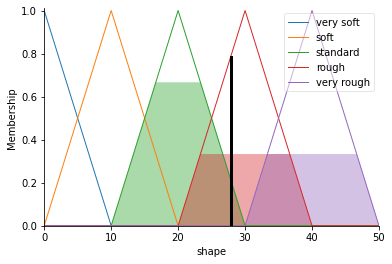

In [43]:
# Output calculation

shapeOut_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
shapeOut_out = ctrl.ControlSystemSimulation(shapeOut_control)

shapeOut_out.input['many'] = 40 # 0 - 60
shapeOut_out.input['time'] = 10 # 0 - 30
shapeOut_out.compute() # 0 - 50

print(shapeOut_out.output['shape'])
shape.view(sim=shapeOut_out)

Seperti yang sudah ada di keterangan diatas, ketika kita menggunakan Fuzzy sudah diberikan function yang akan membantu kita dalam menemukan keluaranya. saya inisialisasikan varibel [ <i>shapeOut_control</i> ] untuk menyimpan semua Rule Base yang sudah kita buat diawal tadi. Lalu output dari control, saya masukan kedalam [ <i>shapeOut_out</i> ] untuk menyimpan controlSystem yang akan dibuat. <br>

Selanjutnya, dari rumus yang sudah dibuatkan diatas kita bisa menentukan sendiri 2 nilai input yang ingin kita lihat keluaranya. Pada kasus kali ini saya membuat variabel [ <i>many</i> ] di nilai 40, dan [ <i>time</i> ] diangka 10. Maka shape yang akan saya dapatkan dari kedua inputan tersebut adalah 27,8.<br>

Jadi bacanya seperti ini = <b><i>"Jika saya memasukan 'Buah' kedalam mesin blender sebanyak 40 DAN di blender selama 10, maka buah yang saya blender mendapatkan bentuk 27,8 (rough). Yaitu buahnya masih kasar."</b></i>  <br>

# Kalkulasi Perhitungan secara Manual
Dari contoh diatas, saya akan mencoba menghitung secara manual. Berikut penjelasanya : <br>

Sebelumnya kita sudah memberikan nilai variabel "many" = 40, dan "time" = 10. Selanjutnya kita asumsikan kedalam per seratus menjadi 66% dan 33%. Rumus untuk perhitunganya adalah [ <b>many 60-x/30 dan x-30/30</b> ] dan [ <b>time 15-y/15 dan y/15</b> ] 

Sekarang kita masukan variabel x dan y dengan nilainya (40 dan 10) <br>
- 60-x/30 dan x-30/30 = 60-40/30 = <b>2/3</b> dan 40-30/30 = <b>1/3</b> <br>
- 15-y/15 dan y/15    = 15-10/15 = <b>1/3</b> dan 15/10 = <b>1 1/2</b>

# Deffuzzification

Disini akan memperhitungkan Deffuzzifikasi dengan metode menncari "Min" dan "Max". Berikut penjelasanya :
- Rule 1 = standard(2/3)   ||   medium(1/3)  -> min(1/3)
- Rule 2 = standard(2/3)   ||   fast(1 1/2)  -> min(2/3)
- Rule 3 = large(1/3)      ||   medium(1/3)  -> min(1/3)
- Rule 4 = large(1/3)      ||   fast(1 1/2)  -> min(1/3)

max(1/3, 2/3, 1/3, 1/3) = 2/3 --> Many (Standard) dan Time (Fast) <br>
Sekarang mari disesuaikan dengan Rule Base yang sudah dibuat tadi. Bacanya seperti ini = <i><b>"jika Many-nya Standard dan Time-nya Fast, maka Shape nya adalah Soft"</b></i>

Jadi, Fast bernilai x/10 dan 20-x/15 <br>
2/3 = x/10 dan 2/3 = 20-x/15 <br>
x = 6,6 dan x = 10 <br>
maka x = 6,6+10/2 = <b>8,3</b>

# Kesimpulan

Hasil perhitungan Fuzzy Logic Controller antara menggunakan perhitungan Manual dan menggunakan Library Fuzzy itu <b>Berbeda</b>. Jika dalam perhitungan Manual, hasilnya adalah "Fast" dan jika menggunakan Library Fuzzy hasilnya adalah "Rough".<br>
Dari materi ini saya menjadi belajar bagaimana menghitung dengan Logika Fuzzy, baik secara manual maupun menggunakan Library Fuzzy. Semoga kedepanya bisa lebih paham lagi